In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)##by writting max_columns you can see all columns

In [3]:
df = pd.read_csv("../data/raw/transactions.csv")##.. used to comeout of the folder(relative path)
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [4]:
df[df["fraud_flag"]==1]

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
740,TXN0000000741,30-10-2024 17:37,Recharge,Healthcare,361,SUCCESS,18-25,18-25,Karnataka,SBI,ICICI,Android,5G,1,17,Wednesday,0
1228,TXN0000001229,22-06-2024 00:21,P2P,Fuel,479,SUCCESS,26-35,36-45,Karnataka,SBI,HDFC,iOS,4G,1,0,Saturday,1
2777,TXN0000002778,12-06-2024 19:46,P2P,Food,162,SUCCESS,18-25,36-45,Gujarat,PNB,ICICI,iOS,4G,1,19,Wednesday,0
3761,TXN0000003762,30-01-2024 19:57,P2M,Transport,754,SUCCESS,26-35,36-45,Karnataka,ICICI,SBI,Android,5G,1,19,Tuesday,0
3962,TXN0000003963,28-11-2024 21:36,P2P,Healthcare,402,SUCCESS,26-35,36-45,Maharashtra,Yes Bank,Kotak,Web,4G,1,21,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247717,TXN0000247718,29-09-2024 07:32,P2M,Grocery,356,SUCCESS,26-35,26-35,Rajasthan,SBI,IndusInd,Android,WiFi,1,7,Sunday,1
247880,TXN0000247881,18-01-2024 17:32,P2P,Other,450,SUCCESS,26-35,36-45,Maharashtra,Axis,Kotak,Android,4G,1,17,Thursday,0
248661,TXN0000248662,21-11-2024 19:26,P2M,Food,152,SUCCESS,18-25,46-55,Karnataka,Kotak,HDFC,Android,4G,1,19,Thursday,0
248716,TXN0000248717,19-12-2024 19:45,P2P,Fuel,457,SUCCESS,18-25,26-35,Gujarat,Axis,HDFC,Android,4G,1,19,Thursday,0


In [5]:
df["fraud_flag"].value_counts()


fraud_flag
0    249520
1       480
Name: count, dtype: int64

% of fraud transactions

In [6]:
df.shape[0]

250000

In [7]:
per = (df[df["fraud_flag"] ==1].shape[0]/df.shape[0])*100
per

0.192

In [8]:
df.isnull().sum()

transaction id        0
timestamp             0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_age_group      0
receiver_age_group    0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
hour_of_day           0
day_of_week           0
is_weekend            0
dtype: int64

In [9]:
df.head(10)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0
5,TXN0000000006,07-10-2024 22:32,P2P,Food,91,SUCCESS,36-45,18-25,Karnataka,IndusInd,Yes Bank,Android,3G,0,22,Monday,0
6,TXN0000000007,08-02-2024 10:25,P2P,Other,314,SUCCESS,36-45,18-25,Telangana,HDFC,IndusInd,Android,4G,0,10,Thursday,0
7,TXN0000000008,27-10-2024 18:47,P2P,Utilities,264,SUCCESS,46-55,36-45,Maharashtra,Yes Bank,SBI,Android,5G,0,18,Sunday,1
8,TXN0000000009,21-11-2024 09:39,P2P,Other,887,SUCCESS,46-55,36-45,Maharashtra,Kotak,HDFC,Android,4G,0,9,Thursday,0
9,TXN0000000010,11-11-2024 15:58,P2M,Grocery,3260,SUCCESS,46-55,18-25,Delhi,SBI,HDFC,Android,4G,0,15,Monday,0


In [10]:
df.duplicated().sum()##checks in row

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [12]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

## checking the data

In [13]:
df[df["amount (INR)"]<=0]

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend


In [14]:
df[~df["hour_of_day"].between(0,23)]##~ is used to ignore the statement(opposite of the statement)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend


In [15]:
pd.crosstab(df["day_of_week"],df["is_weekend"])## o is days and 1 is weekend

is_weekend,0,1
day_of_week,,
Friday,35496,0
Monday,36495,0
Saturday,0,35334
Sunday,0,36003
Thursday,35432,0
Tuesday,35540,0
Wednesday,35700,0


In [16]:
df["amount (INR)"].describe()

count    250000.000000
mean       1311.756036
std        1848.059224
min          10.000000
25%         288.000000
50%         629.000000
75%        1596.000000
max       42099.000000
Name: amount (INR), dtype: float64

In [17]:
df.groupby("fraud_flag")["amount (INR)"].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_flag,,,,,,,,
0,249520.0,1311.395391,1847.210565,10.0,288.0,629.0,1596.0,42099.0
1,480.0,1499.231250,2240.707939,28.0,260.0,618.5,1673.5,17718.0


# Visualization

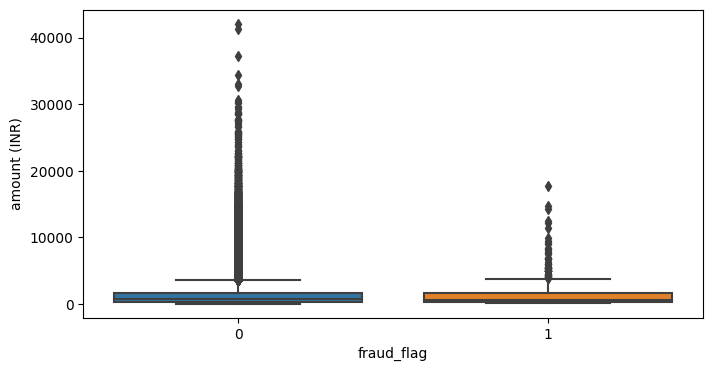

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x= "fraud_flag",y = "amount (INR)",data = df)
plt.show()

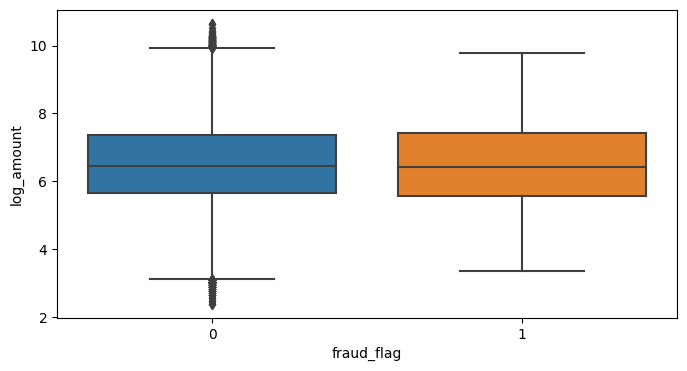

In [19]:
df["log_amount"]=np.log1p(df["amount (INR)"])

plt.figure(figsize=(8,4))
sns.boxplot(x= "fraud_flag",y = "log_amount",data = df)
plt.show()

In [20]:
hour_fraud = pd.crosstab(
    df['hour_of_day'],
    df['fraud_flag'],
    normalize='index'
)

hour_fraud

fraud_flag,0,1
hour_of_day,,
0,0.997639,0.002361
1,0.997326,0.002674
2,0.998220,0.001780
3,0.996956,0.003044
4,0.999198,0.000802
5,0.999426,0.000574
6,0.998572,0.001428
7,0.997691,0.002309
8,0.997844,0.002156


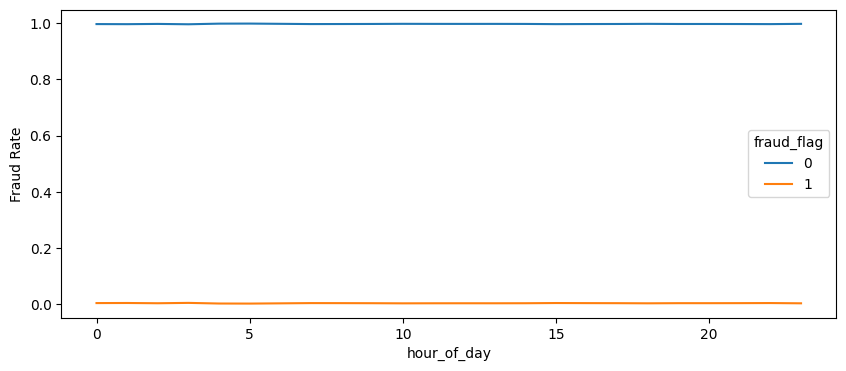

In [21]:
hour_fraud.plot(kind='line', figsize=(10,4))
plt.ylabel("Fraud Rate")
plt.show()

In [22]:
day_fraud = pd.crosstab(
    df['day_of_week'],
    df['fraud_flag'],
    normalize='index'
)

day_fraud.sort_values(1, ascending=False)

fraud_flag,0,1
day_of_week,,
Wednesday,0.997899,0.002101
Sunday,0.997917,0.002083
Thursday,0.997968,0.002032
Monday,0.998055,0.001945
Saturday,0.998076,0.001924
Friday,0.998281,0.001719
Tuesday,0.998368,0.001632


In [23]:
pd.crosstab(
    df['is_weekend'],
    df['fraud_flag'],
    normalize='index'
)

fraud_flag,0,1
is_weekend,,
0,0.998114,0.001886
1,0.997995,0.002005


In [24]:
pd.crosstab(
    df['device_type'],
    df['fraud_flag'],
    normalize='index'
).sort_values(1, ascending=False)

fraud_flag,0,1
device_type,,
Web,0.997938,0.002062
Android,0.998062,0.001938
iOS,0.998186,0.001814


In [25]:
pd.crosstab(
    df['network_type'],
    df['fraud_flag'],
    normalize='index'
).sort_values(1, ascending=False)

fraud_flag,0,1
network_type,,
WiFi,0.997653,0.002347
3G,0.998076,0.001924
4G,0.998118,0.001882
5G,0.998162,0.001838


In [26]:
pd.crosstab(
    df['transaction type'],
    df['fraud_flag'],
    normalize='index'
)

fraud_flag,0,1
transaction type,,
Bill Payment,0.997939,0.002061
P2M,0.998095,0.001905
P2P,0.998168,0.001832
Recharge,0.997605,0.002395


In [27]:
pd.crosstab(
    df['sender_state'],
    df['fraud_flag'],
    normalize='index'
).sort_values(1, ascending=False)

fraud_flag,0,1
sender_state,,
Karnataka,0.997681,0.002319
Rajasthan,0.997698,0.002302
Gujarat,0.997857,0.002143
Delhi,0.997990,0.002010
Maharashtra,0.998103,0.001897
West Bengal,0.998248,0.001752
Andhra Pradesh,0.998251,0.001749
Telangana,0.998262,0.001738
Uttar Pradesh,0.998274,0.001726


In [28]:
df['same_bank'] = (df['sender_bank'] == df['receiver_bank']).astype(int)

pd.crosstab(
    df['same_bank'],
    df['fraud_flag'],
    normalize='index'
)

fraud_flag,0,1
same_bank,,
0,0.998048,0.001952
1,0.998265,0.001735


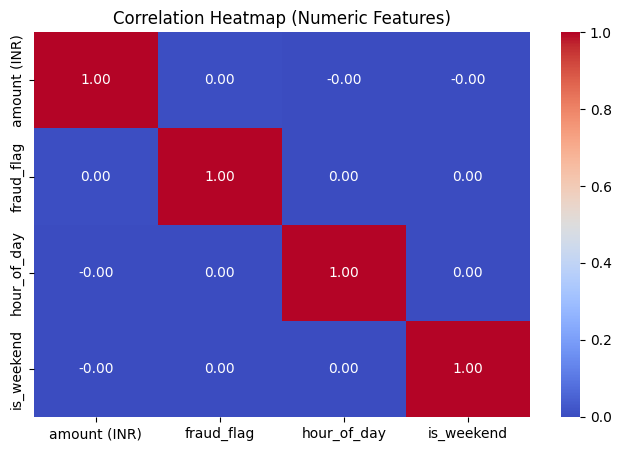

In [29]:
# Select numeric columns
numeric_df = df[['amount (INR)', 'fraud_flag', 'hour_of_day', 'is_weekend']]

# Correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()